In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

C:\Users\ulasz\anaconda3\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('C:\\Users\\ulasz\\OneDrive\\Pulpit\\STUDIA\\portfolio\\LoanRepaymentPredictor-ANN\\data\\data_post_processed')

In [3]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [6]:
X_train.shape

(316824, 77)

Normalizacja Danych

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [15]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(X_train.shape[1]//2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(X_train.shape[1]//2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')


In [16]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4031 - val_loss: 0.2645
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2674 - val_loss: 0.2612
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2663 - val_loss: 0.2600
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2614 - val_loss: 0.2596
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2608 - val_loss: 0.2595
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2610 - val_loss: 0.2594
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2615 - val_loss: 0.2589
Epoch 8/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2610 - val_loss: 0.2588
Epoch 9/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2603 - val_loss: 0.2587
Epoch 10/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2578 - val_loss: 0.2590
Epoch 11/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2597 - val_loss: 0.2589
Epoch 12/100
619/619 ━━━━━━━━━━━━━━━━━━━━

<AxesSubplot:>

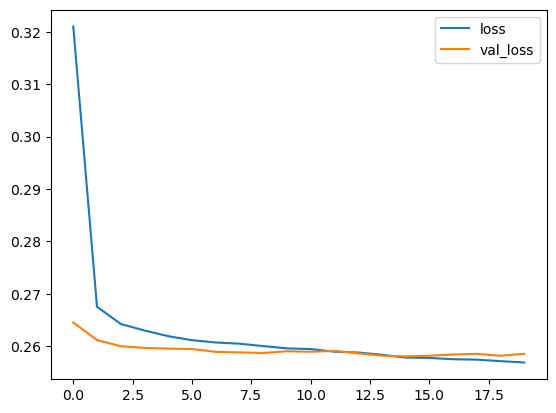

In [19]:
pd.DataFrame(model.history.history).plot()

In [25]:
probabilities = model.predict(X_test)
predictions = (probabilities > 0.5).astype(int)

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [26]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 6824  8776]
 [   64 63542]]
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15600
           1       0.88      1.00      0.93     63606

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [29]:
model2 = Sequential()

model2.add(Dense(X_train.shape[1], activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(X_train.shape[1]//2, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(X_train.shape[1]//4, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(X_train.shape[1]//8, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(X_train.shape[1]//8, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(loss = 'binary_crossentropy', optimizer='adam')

In [31]:
model2.fit(x=X_train, y=y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4526 - val_loss: 0.2654
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2921 - val_loss: 0.2624
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2804 - val_loss: 0.2624
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2746 - val_loss: 0.2622
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2724 - val_loss: 0.2614
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2708 - val_loss: 0.2612
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2692 - val_loss: 0.2621
Epoch 8/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2679 - val_loss: 0.2607
Epoch 9/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2681 - val_loss: 0.2604
Epoch 10/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2667 - val_loss: 0.2609
Epoch 11/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2680 - val_loss: 0.2607
Epoch 12/100
619/619 ━━━━━━━━━━━━━━━━━━━━

<AxesSubplot:>

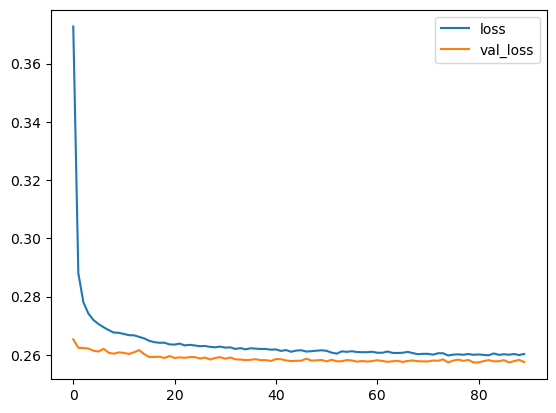

In [32]:
pd.DataFrame(model2.history.history).plot()

In [33]:
probabilities = model.predict(X_test)
predictions = (probabilities > 0.5).astype(int)

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [34]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 6824  8776]
 [   64 63542]]
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15600
           1       0.88      1.00      0.93     63606

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206

